In [1]:
import pandas as pd

In [2]:
data = pd.read_parquet('gwas_fm_t2d.parquet')
df = pd.read_csv('chromosome_results_t2d.csv')
df = df.loc[df['chromosome'] <= 21]

In [3]:

# Count unique genes per '#chrom' in the 'data' DataFrame
unique_gene_counts = data.groupby('#chrom')['gene_0'].nunique().reset_index()
unique_gene_counts.rename(columns={'#chrom': 'chromosome', 'gene_0': 'unique_gene_count'}, inplace=True)

# Calculate the average of unique_gene_count across all chromosomes
average_unique_gene_count = unique_gene_counts['unique_gene_count'].mean()

# Create the standardization_ratio column
unique_gene_counts['standardization_ratio'] = 1 / (unique_gene_counts['unique_gene_count'] / average_unique_gene_count)

# Merge this unique_gene_count and standardization_ratio back to the df DataFrame
df = pd.merge(df, unique_gene_counts[['chromosome', 'unique_gene_count', 'standardization_ratio']], on='chromosome', how='left')


In [4]:
df_filtered = df[df['causal_nodes_count'] > 0]

In [5]:
df_filtered

,chromosome,total_nodes,total_edges,connected_components,causal_nodes_count,causal_node_details,component_details,edge_checks,unique_gene_count,standardization_ratio
1,2,19029,19398858,57,4,"{223: 0, 224: 0, 227: 0, 228: 0}",{0: 901},"[{'component': 0, 'node_pair': (223, 224), 'ha...",84,0.571970
2,3,8553,1035008,61,5,"{17: 1, 36: 1, 37: 1, 39: 1, 42: 1}",{1: 1034},"[{'component': 1, 'node_pair': (17, 36), 'has_...",83,0.578861
3,4,21264,13119653,39,4,"{119: 0, 123: 0, 125: 0, 126: 0}",{0: 2601},"[{'component': 0, 'node_pair': (119, 123), 'ha...",64,0.750710
4,5,23931,16359718,36,4,"{7794: 10, 23849: 2, 23850: 2, 23854: 2}","{10: 1570, 2: 478}","[{'component': 2, 'node_pair': (23849, 23850),...",55,0.873554
5,6,696,59052,3,1,{22: 0},{0: 682},[],18,2.669192
6,7,19426,23540527,38,5,"{134: 1, 164: 1, 168: 1, 169: 1, 11688: 1}",{1: 3726},"[{'component': 1, 'node_pair': (134, 164), 'ha...",56,0.857955
7,8,191,3353,12,2,"{147: 0, 148: 0}",{0: 96},"[{'component': 0, 'node_pair': (147, 148), 'ha...",23,2.088933
8,9,37205,61938018,72,1,{3: 0},{0: 947},[],92,0.522233
9,10,2300,1026823,38,7,"{0: 0, 2014: 0, 2114: 0, 2116: 0, 2122: 0, 229...",{0: 1531},"[{'component': 0, 'node_pair': (0, 2014), 'has...",49,0.980519
10,11,25265,29373425,144,9,"{1382: 54, 1384: 54, 1397: 54, 7237: 61, 7239:...","{61: 1531, 54: 6253}","[{'component': 54, 'node_pair': (1382, 1384), ...",195,0.246387


### Standardized Percentage of Total Nodes and Edges per Chromosome (Causal Nodes Count > 0)

C:\Users\Windows\AppData\Local\Temp\ipykernel_32132\2021538617.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage_total_nodes'] = (df_filtered['total_nodes'] / total_nodes * 100).fillna(0)
C:\Users\Windows\AppData\Local\Temp\ipykernel_32132\2021538617.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage_total_edges'] = (df_filtered['total_edges'] / total_edges * 100).fillna(0)
C:\Users\Windows\AppData\Local\Temp\ipykernel_32132\2021538617.py:14: SettingWithC

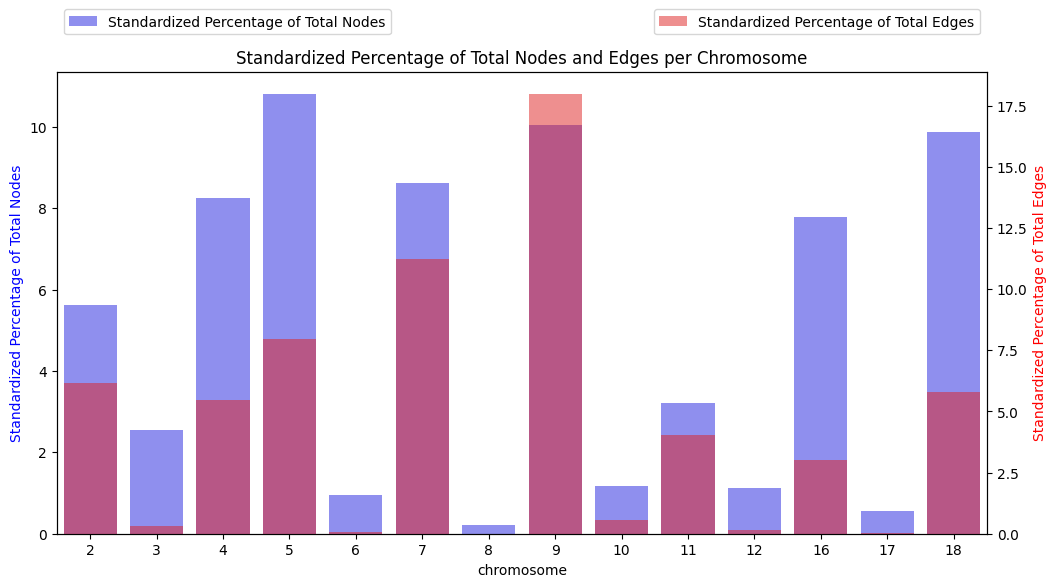

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Check if 'unique_gene_count' and 'standardization_ratio' exist in df_filtered
if 'unique_gene_count' in df_filtered.columns and 'standardization_ratio' in df_filtered.columns:
    total_nodes = df_filtered['total_nodes'].sum()
    total_edges = df_filtered['total_edges'].sum()
    
    df_filtered['percentage_total_nodes'] = (df_filtered['total_nodes'] / total_nodes * 100).fillna(0)
    df_filtered['percentage_total_edges'] = (df_filtered['total_edges'] / total_edges * 100).fillna(0)
    
    # Multiply by the standardization_ratio
    df_filtered['standardized_percentage_total_nodes'] = df_filtered['percentage_total_nodes'] * df_filtered['standardization_ratio']
    df_filtered['standardized_percentage_total_edges'] = df_filtered['percentage_total_edges'] * df_filtered['standardization_ratio']
else:
    print("Required columns not found in df_filtered")

plt.figure(figsize=(12, 6))

# Bar plot for standardized percentage of total nodes
ax1 = sns.barplot(x='chromosome', y='standardized_percentage_total_nodes', data=df_filtered, color='blue', alpha=0.5, label='Standardized Percentage of Total Nodes')

# Create a second y-axis for the standardized percentage of total edges
ax2 = plt.gca().twinx()
sns.barplot(x='chromosome', y='standardized_percentage_total_edges', data=df_filtered, color='red', alpha=0.5, ax=ax2, label='Standardized Percentage of Total Edges')

# Adding labels and title
ax1.set_ylabel('Standardized Percentage of Total Nodes', color='blue')
ax2.set_ylabel('Standardized Percentage of Total Edges', color='red')
plt.xlabel('Chromosome')
plt.title('Standardized Percentage of Total Nodes and Edges per Chromosome')

# Adding legend for both y-axes
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1.15))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1.15))

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


### Chromosome-wise Distribution of Standardized % of Total Nodes and Standardized % of Max Possible Edges

C:\Users\Windows\AppData\Local\Temp\ipykernel_32132\3722617091.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['percentage_total_nodes'] = (df_filtered['total_nodes'] / total_nodes * 100).fillna(0)
C:\Users\Windows\AppData\Local\Temp\ipykernel_32132\3722617091.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['fully_connected_fraction'] = (df_filtered['total_edges'] / max_possible_edges * 100).fillna(0)
C:\Users\Windows\AppData\Local\Temp\ipykernel_32132\3722617091.py:17: Set

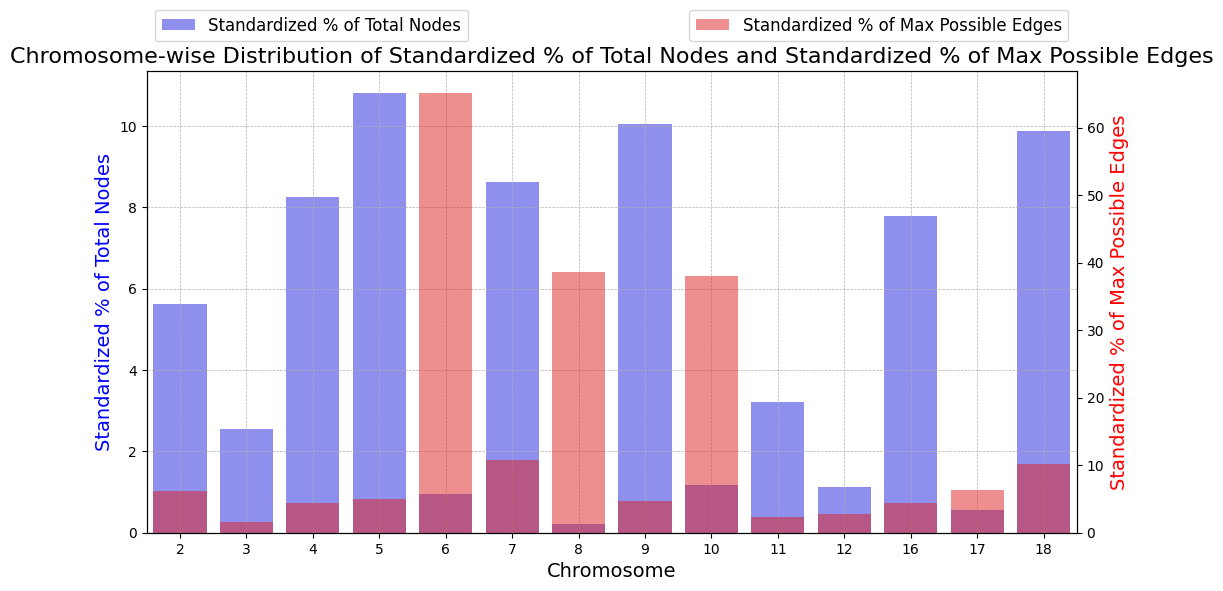

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Check if 'unique_gene_count' and 'standardization_ratio' exist in df_filtered
if 'unique_gene_count' in df_filtered.columns and 'standardization_ratio' in df_filtered.columns:
    total_nodes = df_filtered['total_nodes'].sum()
    total_edges = df_filtered['total_edges'].sum()
    
    df_filtered['percentage_total_nodes'] = (df_filtered['total_nodes'] / total_nodes * 100).fillna(0)

    # Calculate the maximum possible edges and then the fraction of fully connected graph in terms of percentage
    max_possible_edges = df_filtered['total_nodes'] * (df_filtered['total_nodes'] - 1) / 2
    df_filtered['fully_connected_fraction'] = (df_filtered['total_edges'] / max_possible_edges * 100).fillna(0)

    # Standardize these percentages using the standardization_ratio
    df_filtered['standardized_percentage_total_nodes'] = df_filtered['percentage_total_nodes'] * df_filtered['standardization_ratio']
    df_filtered['standardized_fully_connected_fraction'] = df_filtered['fully_connected_fraction'] * df_filtered['standardization_ratio']
else:
    print("Required columns not found in df_filtered")

plt.figure(figsize=(12, 6))

# Bar plot for standardized percentage of total nodes
ax1 = sns.barplot(x='chromosome', y='standardized_percentage_total_nodes', data=df_filtered, color='blue', alpha=0.5, label='Standardized % of Total Nodes', ci='sd')

# Create a second y-axis for the standardized fully connected fraction in percentage
ax2 = plt.gca().twinx()
sns.barplot(x='chromosome', y='standardized_fully_connected_fraction', data=df_filtered, color='red', alpha=0.5, ax=ax2, label='Standardized % of Max Possible Edges', ci='sd')

# Adding labels and title
ax1.set_xlabel('Chromosome', fontsize=14)
ax1.set_ylabel('Standardized % of Total Nodes', color='blue', fontsize=14)
ax2.set_ylabel('Standardized % of Max Possible Edges', color='red', fontsize=14)
plt.title('Chromosome-wise Distribution of Standardized % of Total Nodes and Standardized % of Max Possible Edges', fontsize=16)

# Adding legend for both y-axes
ax1.legend(loc='upper left', bbox_to_anchor=(0,1.15), fontsize=12)
ax2.legend(loc='upper right', bbox_to_anchor=(1,1.15), fontsize=12)

# Adding a grid in the background for better readability
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

plt.show()


### Standardized Percentage of Causal Nodes per Chromosome

C:\Users\Windows\AppData\Local\Temp\ipykernel_32132\656026293.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['causal_node_percentage'] = (df_filtered['causal_nodes_count'] / df_filtered['total_nodes']) * 100
C:\Users\Windows\AppData\Local\Temp\ipykernel_32132\656026293.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['standardized_causal_node_percentage'] = df_filtered['causal_node_percentage'] * df_filtered['standardization_ratio']
C:\Users\Windows\AppData\Local\Programs\P

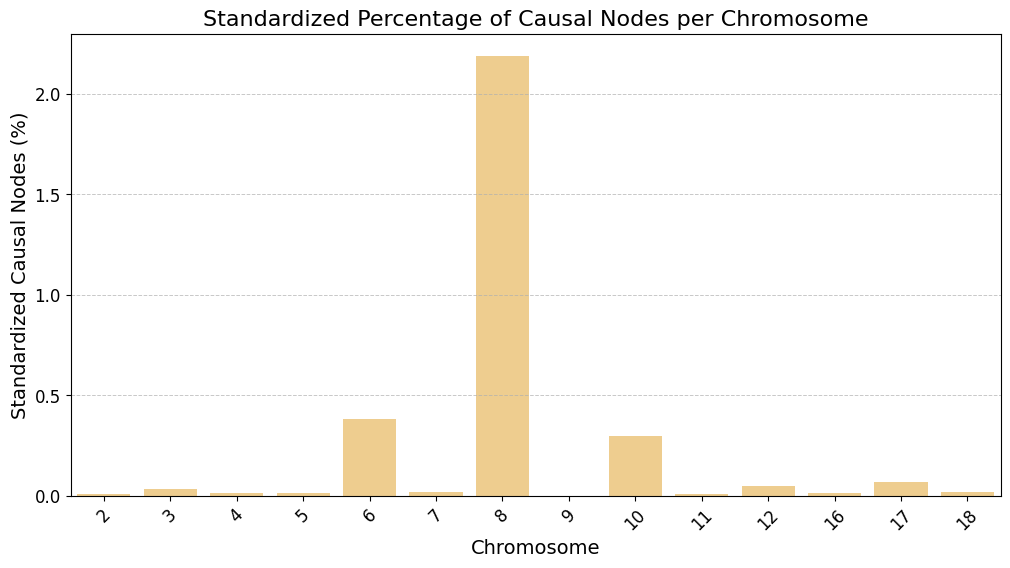

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Rename 'chromosome' column in data to avoid conflict
data.rename(columns={'#chrom': 'data_chromosome'}, inplace=True)

# Assume df_filtered is your DataFrame containing 'chromosome', 'total_nodes', 'causal_nodes_count', and 'standardization_ratio' columns

# Check if 'standardization_ratio' exists in df_filtered
if 'standardization_ratio' in df_filtered.columns:
    # Calculate the percentage of causal nodes
    df_filtered['causal_node_percentage'] = (df_filtered['causal_nodes_count'] / df_filtered['total_nodes']) * 100

    # Standardize by using the new column 'standardization_ratio'
    df_filtered['standardized_causal_node_percentage'] = df_filtered['causal_node_percentage'] * df_filtered['standardization_ratio']

    # Aggregate the standardized values by chromosome for plotting
    df_aggregated = df_filtered.groupby('chromosome').agg({'standardized_causal_node_percentage': 'mean'}).reset_index()

    plt.figure(figsize=(12, 6))

    # Create a bar plot to represent the standardized percentage of causal nodes per chromosome
    sns.barplot(x='chromosome', y='standardized_causal_node_percentage', data=df_aggregated, color='orange', alpha=0.5)

    # Adding labels, title, and grid
    plt.ylabel('Standardized Causal Nodes (%)', fontsize=14)
    plt.xlabel('Chromosome', fontsize=14)
    plt.title('Standardized Percentage of Causal Nodes per Chromosome', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)

    # Rotating the x-axis labels for better readability
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()
else:
    print("'standardization_ratio' not found in df_filtered")


### Standardized Number of Causal Nodes per Chromosome (Causal Nodes Count > 0)

C:\Users\Windows\AppData\Local\Temp\ipykernel_32132\3437054650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['standardized_causal_nodes_count'] = df_filtered['causal_nodes_count'] * df_filtered['standardization_ratio']
C:\Users\Windows\AppData\Local\Temp\ipykernel_32132\3437054650.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='chromosome', y='standardized_causal_nodes_count', data=df_aggregated_count, color='orange', alpha=0.5, ci='sd')
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDt

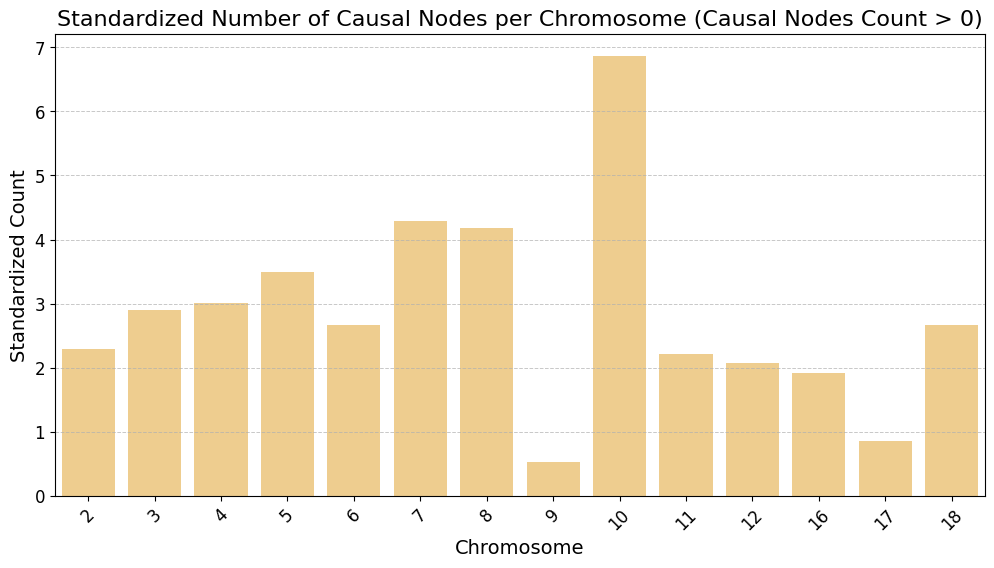

In [9]:
# Standardize the count of causal nodes by using the standardization_ratio
df_filtered['standardized_causal_nodes_count'] = df_filtered['causal_nodes_count'] * df_filtered['standardization_ratio']

# Aggregate the standardized values by chromosome for plotting
df_aggregated_count = df_filtered.groupby('chromosome').agg({'standardized_causal_nodes_count': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))

# Create a bar plot to represent the standardized count of causal nodes per chromosome
sns.barplot(x='chromosome', y='standardized_causal_nodes_count', data=df_aggregated_count, color='orange', alpha=0.5, ci='sd')

# Adding labels, title, and grid
plt.ylabel('Standardized Count', fontsize=14)
plt.xlabel('Chromosome', fontsize=14)
plt.title('Standardized Number of Causal Nodes per Chromosome (Causal Nodes Count > 0)', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


### Number of Connected Components per Chromosome

C:\Users\Windows\AppData\Local\Temp\ipykernel_32132\1782959735.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='chromosome', y='connected_components', data=df_filtered, color='green', alpha=0.5, label='Connected Components', ci='sd')
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_cat

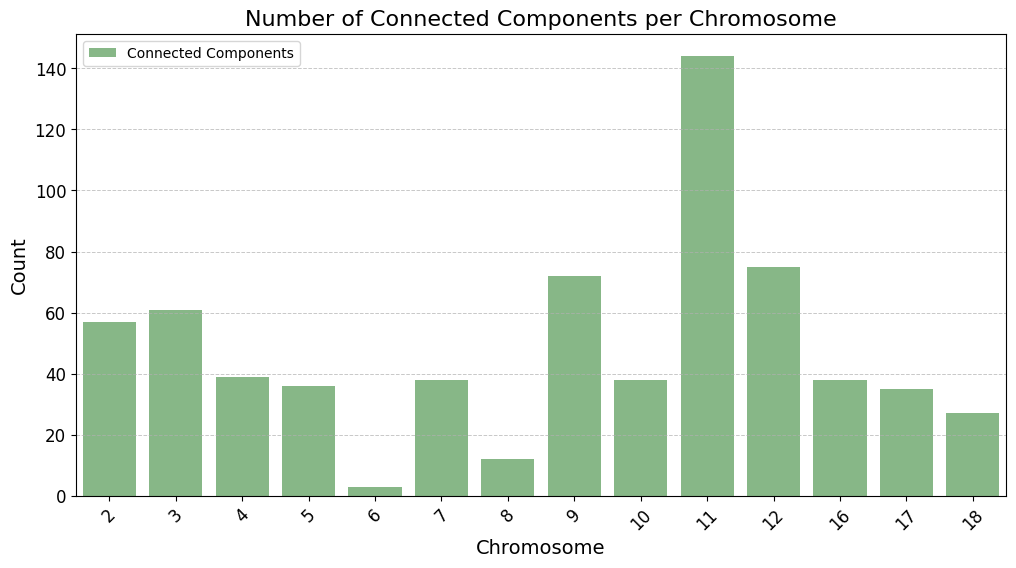

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume df_filtered is your DataFrame
# Check if 'connected_components' exists in df_filtered
if 'connected_components' in df_filtered.columns:
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x='chromosome', y='connected_components', data=df_filtered, color='green', alpha=0.5, label='Connected Components', ci='sd')
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('Chromosome', fontsize=14)
    plt.title('Number of Connected Components per Chromosome', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
    plt.show()
else:
    print("'connected_components' not found in df_filtered")


### Distribution of Total Nodes and Causal Nodes per Component ID Across Different Chromosomes

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ast import literal_eval

# Assuming df_filtered is your existing DataFrame
df = df_filtered

def safe_literal_eval(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError):
        return val

def count_causal_nodes(causal_node_details):
    counts = {}
    for _, component_id in causal_node_details.items():
        counts[component_id] = counts.get(component_id, 0) + 1
    return counts

df['component_details'] = df['component_details'].apply(safe_literal_eval)
df['causal_node_details'] = df['causal_node_details'].apply(safe_literal_eval)
df['avg_component_size'] = df['total_nodes'] / df['connected_components']
df['causal_nodes_per_component'] = df['causal_node_details'].apply(count_causal_nodes)

rows = []
for idx, row in df.iterrows():
    for k, v in row['component_details'].items():
        causal_count = row['causal_nodes_per_component'].get(k, 0)
        rows.append({'chromosome': row['chromosome'], 'component_id': k, 'node_count': v, 'causal_node_count': causal_count})

df_expanded = pd.DataFrame(rows)

chromosomes = df['chromosome'].unique()

n_cols = 6
n_rows = int(len(chromosomes) / n_cols) + (len(chromosomes) % n_cols > 0)

fig_height = 25
fig_width = 2 * fig_height
plt.figure(figsize=(fig_width, fig_height), dpi=200)

sns.set_theme(style="whitegrid", context="talk")

for i, chrom in enumerate(chromosomes):
    df_chrom = df_expanded[df_expanded['chromosome'] == chrom].sort_values('component_id')  # Sort by component_id to ensure consistent order
    plt.subplot(n_rows, n_cols, i+1)
    
    ax1 = plt.gca()

    # Main bars for total nodes
    bar_width = 0.35
    indices = range(len(df_chrom))
    ax1.bar(indices, df_chrom['node_count'], bar_width, label='Total Nodes', color='lightblue')
    ax1.set_xlabel('Component ID', fontsize=12)
    ax1.set_ylabel('Node Count', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='lightblue')
    ax1.set_title(f'Chrom {chrom}', fontsize=14, fontweight='bold')
    ax1.legend(loc='upper left', fontsize=9)

    # Secondary y-axis for causal nodes
    ax2 = ax1.twinx()
    ax2.bar([i + bar_width for i in indices], df_chrom['causal_node_count'], bar_width, label='Causal Nodes', color='coral')
    ax2.set_ylabel('Causal Node Count', fontsize=12, color='coral')
    ax2.tick_params(axis='y', labelcolor='coral')
    ax2.legend(loc='upper right', fontsize=9)

    plt.xticks([i + bar_width / 2 for i in indices], df_chrom['component_id'], rotation=90)

plt.suptitle('Distribution of Total Nodes and Causal Nodes per Component ID Across Different Chromosomes', fontsize=20, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()


### Histogram of # of Causal Nodes Per Component

C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


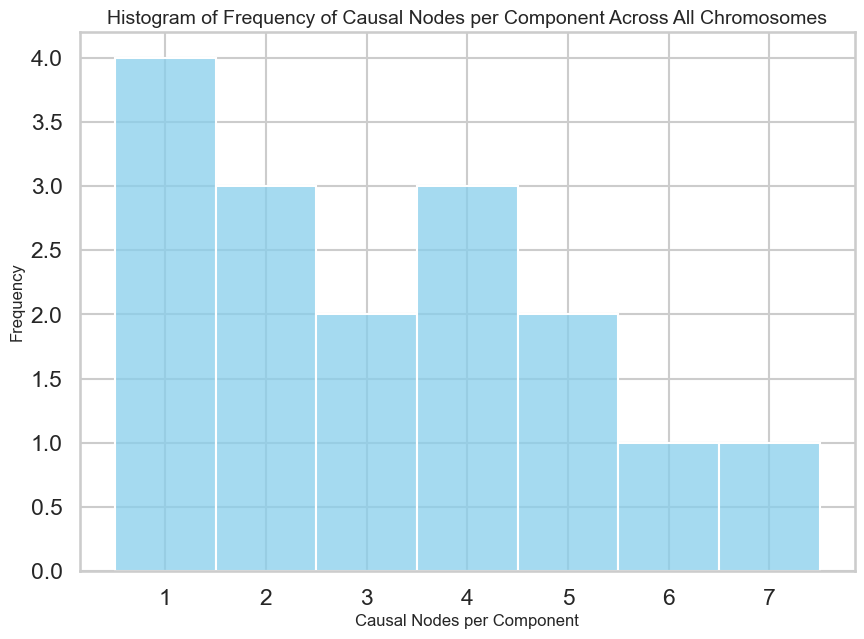

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ast import literal_eval
import matplotlib.ticker as ticker

# Assuming df_filtered is your existing DataFrame
df = df_filtered

def safe_literal_eval(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError):
        return val

def count_causal_nodes(causal_node_details):
    counts = {}
    for _, component_id in causal_node_details.items():
        counts[component_id] = counts.get(component_id, 0) + 1
    return counts

df['component_details'] = df['component_details'].apply(safe_literal_eval)
df['causal_node_details'] = df['causal_node_details'].apply(safe_literal_eval)
df['avg_component_size'] = df['total_nodes'] / df['connected_components']
df['causal_nodes_per_component'] = df['causal_node_details'].apply(count_causal_nodes)

rows = []
for idx, row in df.iterrows():
    for k, v in row['causal_nodes_per_component'].items():
        rows.append({'chromosome': row['chromosome'], 'component_id': k, 'causal_node_count': int(v)})

df_expanded = pd.DataFrame(rows)

# Extract causal node counts for histogram
causal_node_counts = df_expanded['causal_node_count'].astype(int)  # Ensure causal_node_counts are integers

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Plot histogram
ax = sns.histplot(causal_node_counts, bins=30, kde=False, color='skyblue', discrete=True)  # Set discrete=True for integer x-axis values

# Set labels and title
ax.set_xlabel('Causal Nodes per Component', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Histogram of Frequency of Causal Nodes per Component Across All Chromosomes', fontsize=14)

# Set x-axis to only have integer ticks
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()


### Percentage of Components with at Least One Causal Node per Chromosome

C:\Users\Windows\AppData\Local\Temp\ipykernel_32132\3749725823.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='chromosome', y='percentage_components_with_causal_nodes', data=df, color='blue', alpha=0.5, ci='sd')
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is dep

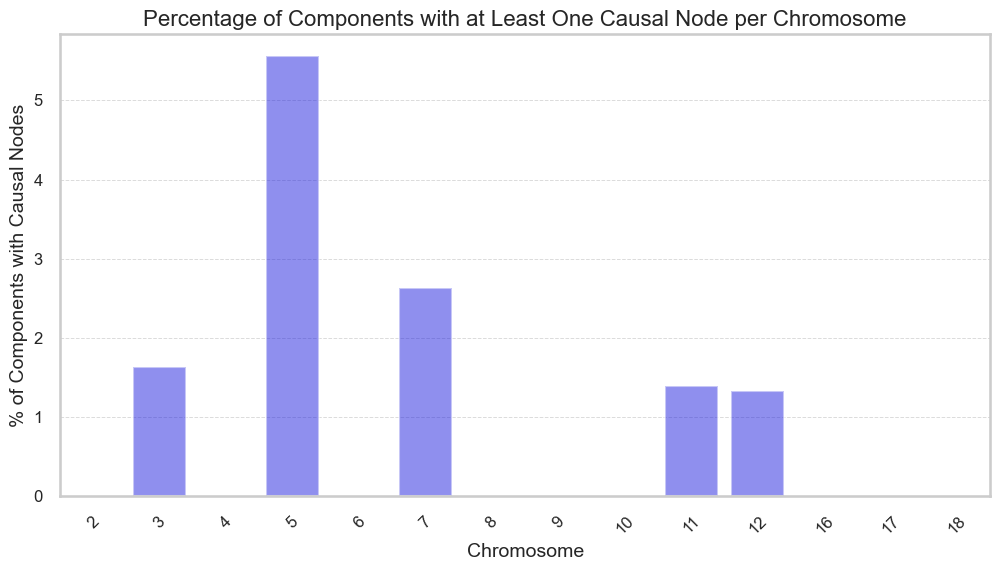

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ast import literal_eval
import numpy as np

# Assuming df_filtered is your existing DataFrame
df = df_filtered

# Functions to safely evaluate literal expressions and calculate causal nodes
def safe_literal_eval(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError):
        return val

df['component_details'] = df['component_details'].apply(safe_literal_eval)
df['causal_node_details'] = df['causal_node_details'].apply(safe_literal_eval)

def calculate_causal_nodes(row):
    try:
        causal_node_details = row['causal_node_details'] or {}
        components_with_causal_nodes = len(set(v for v in causal_node_details.values() if v > 0))
        return components_with_causal_nodes
    except AttributeError:
        return 0

df['components_with_causal_nodes'] = df.apply(calculate_causal_nodes, axis=1)

# Create new column to store the percentage
df['percentage_components_with_causal_nodes'] = (df['components_with_causal_nodes'] / df['connected_components']).replace([np.inf, -np.inf, np.nan], 0) * 100

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='chromosome', y='percentage_components_with_causal_nodes', data=df, color='blue', alpha=0.5, ci='sd')

# Adding labels, title, and grid
plt.ylabel('% of Components with Causal Nodes', fontsize=14)
plt.xlabel('Chromosome', fontsize=14)
plt.title('Percentage of Components with at Least One Causal Node per Chromosome', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


### Standardized Percentage of Components with at Least One Causal Node per Chromosome

C:\Users\Windows\AppData\Local\Temp\ipykernel_32132\2060733869.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='chromosome', y='standardized_percentage_components_with_causal_nodes', data=df, color='blue', alpha=0.5, ci='sd')
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical

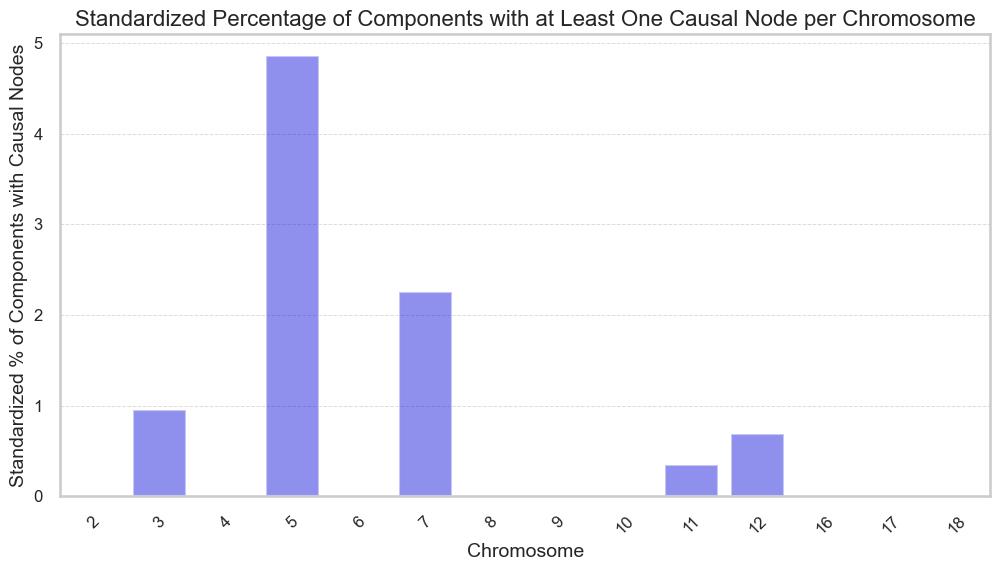

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ast import literal_eval
import numpy as np

# Assuming df_filtered is your existing DataFrame
df = df_filtered

# Functions to safely evaluate literal expressions and calculate causal nodes
def safe_literal_eval(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError):
        return val

df['component_details'] = df['component_details'].apply(safe_literal_eval)
df['causal_node_details'] = df['causal_node_details'].apply(safe_literal_eval)

def calculate_causal_nodes(row):
    try:
        causal_node_details = row['causal_node_details'] or {}
        components_with_causal_nodes = len(set(v for v in causal_node_details.values() if v > 0))
        return components_with_causal_nodes
    except AttributeError:
        return 0

df['components_with_causal_nodes'] = df.apply(calculate_causal_nodes, axis=1)

# Create new column to store the percentage
df['percentage_components_with_causal_nodes'] = (df['components_with_causal_nodes'] / df['connected_components']).replace([np.inf, -np.inf, np.nan], 0) * 100

# Standardizing by standardization_ratio if it exists in df
if 'standardization_ratio' in df.columns:
    df['standardized_percentage_components_with_causal_nodes'] = df['percentage_components_with_causal_nodes'] * df['standardization_ratio']
    df['standardized_percentage_components_with_causal_nodes'].fillna(0, inplace=True)
else:
    print("'standardization_ratio' not found in df")

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='chromosome', y='standardized_percentage_components_with_causal_nodes', data=df, color='blue', alpha=0.5, ci='sd')

# Adding labels, title, and grid
plt.ylabel('Standardized % of Components with Causal Nodes', fontsize=14)
plt.xlabel('Chromosome', fontsize=14)
plt.title('Standardized Percentage of Components with at Least One Causal Node per Chromosome', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


### Correlation Heatmap